In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kgl
import importlib

In [55]:
importlib.reload(kgl)
md = kgl.KGL()
md.make_groups()

            Mug,Mart,F  Hat,Mart,F  Sticker,Mart,F  Mug,Rama,F  Hat,Rama,F  \
2015-01-01         329         520             146         572         911   
2015-01-02         318         493             127         544         794   
2015-01-03         360         535             141         579         843   
2015-01-04         332         544             125         582         873   
2015-01-05         243         378             102         423         668   
...                ...         ...             ...         ...         ...   
2018-12-27         414         573             177         652        1068   
2018-12-28         499         841             223         895        1398   
2018-12-29         774        1107             296        1398        1895   
2018-12-30         757        1113             326        1241        1878   
2018-12-31         469         822             238         831        1231   

            Sticker,Rama,F  Mug,Mart,N  Hat,Mart,N  Sticker,Mar

In [25]:
md.get_basic_info()

Table
       row_id        date  country       store         product  num_sold
0           0  2015-01-01  Finland  KaggleMart      Kaggle Mug       329
1           1  2015-01-01  Finland  KaggleMart      Kaggle Hat       520
2           2  2015-01-01  Finland  KaggleMart  Kaggle Sticker       146
3           3  2015-01-01  Finland  KaggleRama      Kaggle Mug       572
4           4  2015-01-01  Finland  KaggleRama      Kaggle Hat       911
...       ...         ...      ...         ...             ...       ...
26293   26293  2018-12-31   Sweden  KaggleMart      Kaggle Hat       823
26294   26294  2018-12-31   Sweden  KaggleMart  Kaggle Sticker       250
26295   26295  2018-12-31   Sweden  KaggleRama      Kaggle Mug      1004
26296   26296  2018-12-31   Sweden  KaggleRama      Kaggle Hat      1441
26297   26297  2018-12-31   Sweden  KaggleRama  Kaggle Sticker       388

[26298 rows x 6 columns]


Column information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 2

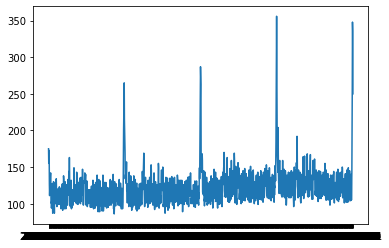

In [70]:
md.show_my_EDA()

In [72]:
md.temp_func()

       row_id        date country       store         product  num_sold
14         14  2015-01-01  Sweden  KaggleMart  Kaggle Sticker       175
32         32  2015-01-02  Sweden  KaggleMart  Kaggle Sticker       155
50         50  2015-01-03  Sweden  KaggleMart  Kaggle Sticker       173
68         68  2015-01-04  Sweden  KaggleMart  Kaggle Sticker       169
86         86  2015-01-05  Sweden  KaggleMart  Kaggle Sticker       127
...       ...         ...     ...         ...             ...       ...
26222   26222  2018-12-27  Sweden  KaggleMart  Kaggle Sticker       196
26240   26240  2018-12-28  Sweden  KaggleMart  Kaggle Sticker       260
26258   26258  2018-12-29  Sweden  KaggleMart  Kaggle Sticker       348
26276   26276  2018-12-30  Sweden  KaggleMart  Kaggle Sticker       336
26294   26294  2018-12-31  Sweden  KaggleMart  Kaggle Sticker       250

[1461 rows x 6 columns]


이상치가 기록된 시점의 date에는 문제가 없다. 이상치이지만 잘못된 값이 아니라면 연말 특수 등의 이유일 수 있다.  
하지만 전체 추세를 파악하는데는 방해가 되는 것이 분명하므로 10-MA를 이용할 것이다.

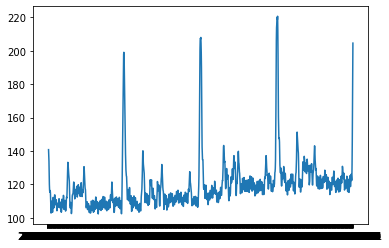

In [87]:
md.moving_average(10)

여전히 이상치에서의 변화가 두드러진다. 전체적으로 조금씩 증가하고 있으며 매 해 여름에도 또한 특이한 패턴이 보이는 걸 확인할 수 있었다.
1. linear regression을 써 볼 여지가 보이나 이렇게 모든 기간을 일렬로 늘어놓고 쓰는 건 1년을 주기로 하는 이상치를 반영할 수 없을 것 같다.  
2. 떠오르는 아이디어로는 linear regression을 1년마다 같은 날을 기준으로 하여 적용하는 것이다. 예를 들면 2015년 1월1일, 2016년 1월1일, 2017년 1월1일 이렇게 세 개의 데이터로 regression을 한 뒤 2018년 1월1일의 값을 예측하는 것이다. 하지만 이러면 사용하는 데이터가 너무 적어 편차가 너무 심해질 것이다.  
3. 또는 매 해 마다 변화율을 a라고 두어서 a를 구한 뒤 2017년1월1일의 값에 a를 곱해서 예측할 수 있다.

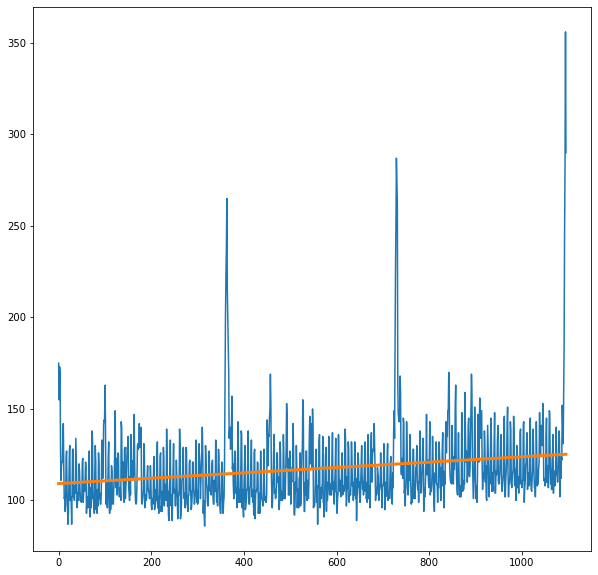

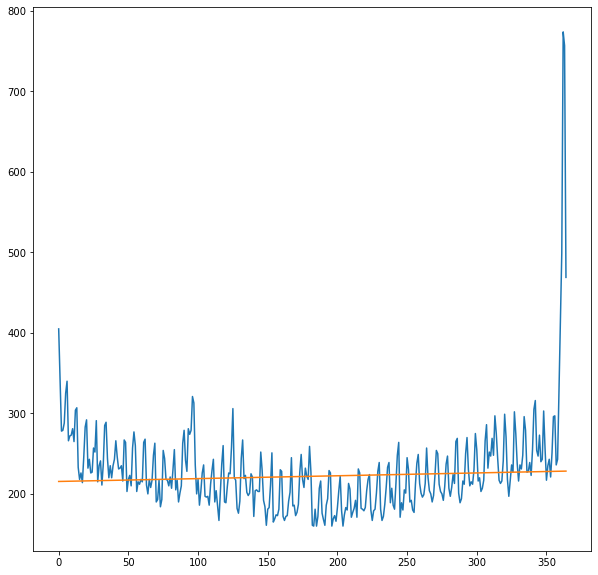

19560.4237322296


In [64]:
md.linear_regression1()
md.show_linear_regression1()
md.get_score1()

첫번째 방법으로 나온 그래프이다. 아래의 주황 선이 linear_regression을 통해 나온 결과이다. 여기서 검증을 위해 2018년의 데이터를 사용할 것이므로 train set으로 2015년에서 2017년까지의 데이터만 사용하였다.

In [20]:
md.df_sold[420:430]

,"Mug,Mart,F","Hat,Mart,F","Sticker,Mart,F","Mug,Rama,F","Hat,Rama,F","Sticker,Rama,F","Mug,Mart,N","Hat,Mart,N","Sticker,Mart,N","Mug,Rama,N","Hat,Rama,N","Sticker,Rama,N","Mug,Mart,S","Hat,Mart,S","Sticker,Mart,S","Mug,Rama,S","Hat,Rama,S","Sticker,Rama,S"
2016-02-25,168,356,90,324,581,147,299,586,137,547,977,236,232,419,104,371,772,178
2016-02-26,186,360,90,329,647,156,331,582,141,580,1098,248,218,431,92,399,808,195
2016-02-27,223,462,119,405,743,191,373,676,166,641,1208,340,266,544,126,469,854,226
2016-02-28,253,417,99,416,775,183,369,726,187,667,1270,329,291,528,128,438,929,224
2016-02-29,178,345,85,297,650,152,315,554,130,524,981,232,211,426,90,349,773,192
2016-03-01,181,372,87,340,589,152,313,576,140,540,962,226,212,400,103,353,747,175
2016-03-02,174,375,78,307,571,151,296,576,130,506,983,231,214,425,105,334,801,173
2016-03-03,179,382,86,327,651,148,265,531,134,508,1058,249,207,439,105,360,746,172
2016-03-04,187,360,94,322,659,163,329,606,164,556,1002,264,223,434,107,391,862,194
2016-03-05,240,465,104,362,768,189,380,723,160,607,1224,310,273,538,121,472,920,236


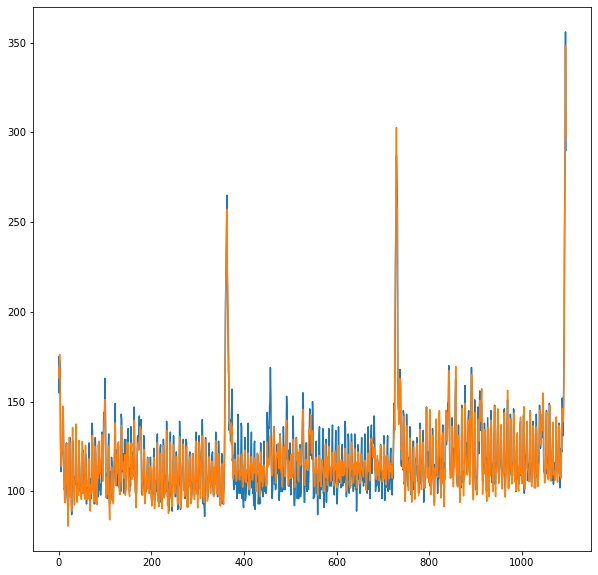

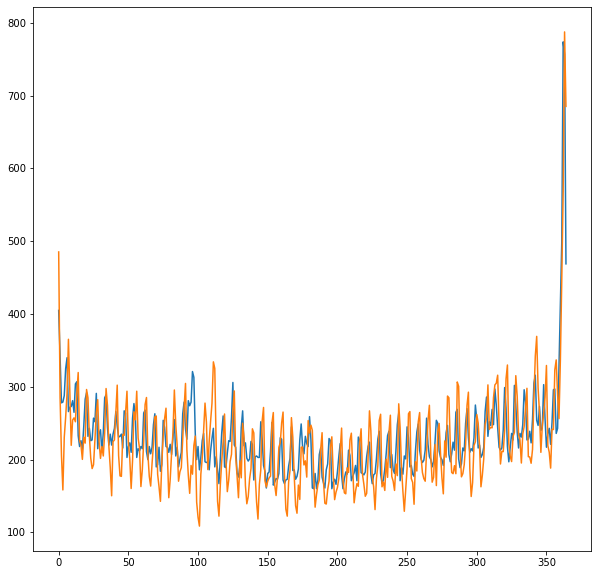

13282.897683071198


In [62]:
md.linear_regression2()
md.show_linear_regression2()
md.get_score2()

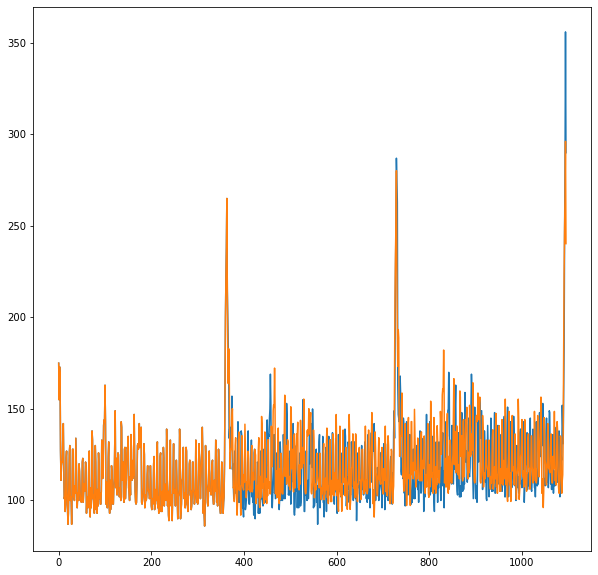

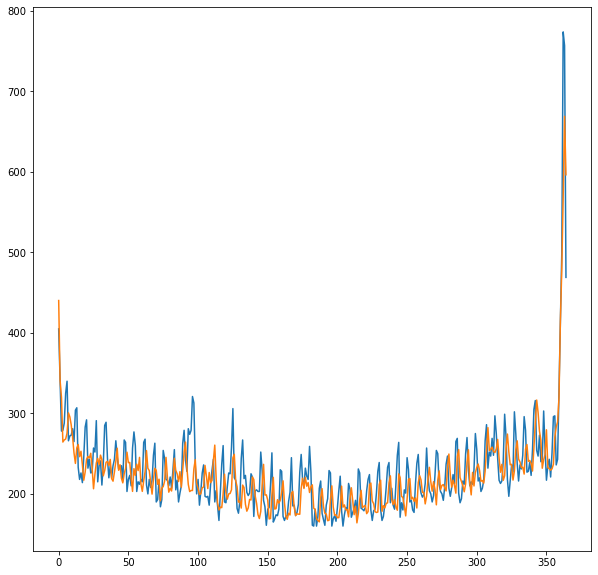

5930.212497291839


In [17]:
md.percentage_regression()
md.show_percentage_regression()
md.get_percentage_score()

In [10]:
md.get_score_default()

7797.5974124809745


In [15]:
md.get_percentage_score2()

6849.332414527606


In [56]:
md.answer_regression()

[329 318 360 ... 774 757 469]
[ 520  493  535 ... 1107 1113  822]
[146 127 141 ... 296 326 238]
[ 572  544  579 ... 1398 1241  831]
[ 911  794  843 ... 1895 1878 1231]
[283 249 265 ... 559 554 360]
[ 526  538  614 ... 1113 1052  728]
[ 906  845  930 ... 1650 1809 1124]
[250 237 254 ... 518 500 351]
[1005  949 1029 ... 1816 1935 1383]
[1461 1446 1631 ... 2884 2851 2128]
[395 415 451 ... 874 833 561]
[440 384 420 ... 720 730 570]
[ 624  572  630 ... 1106 1133  823]
[175 155 173 ... 348 336 250]
[ 706  653  734 ... 1438 1303 1004]
[1195  986 1167 ... 2169 2138 1441]
[324 293 319 ... 596 587 388]
        row_id     num_sold        date  country       store         product
row_id                                                                      
26298    26298   490.517259  2019-01-01  Finland  KaggleMart      Kaggle Mug
26299    26299   762.034348  2019-01-01  Finland  KaggleMart      Kaggle Hat
26300    26300   204.942608  2019-01-01  Finland  KaggleMart  Kaggle Sticker
26301    26301 